In [264]:
# IN THIS NOTEBOOK IM GOING TO TRY TO BLUR THE IMAGE FIRST 
# AND THEN QUANTIZE IT WITH SOME NUMBER OF COLORS (PROBABLY 2 TO 6ish)

In [272]:
import cv2
img = cv2.imread('cropped_Wild018.tif')
blur = cv2.blur(img,(15, 15))
cv2.imwrite('blur_Wild018.tif',blur)
#print(blur)

True

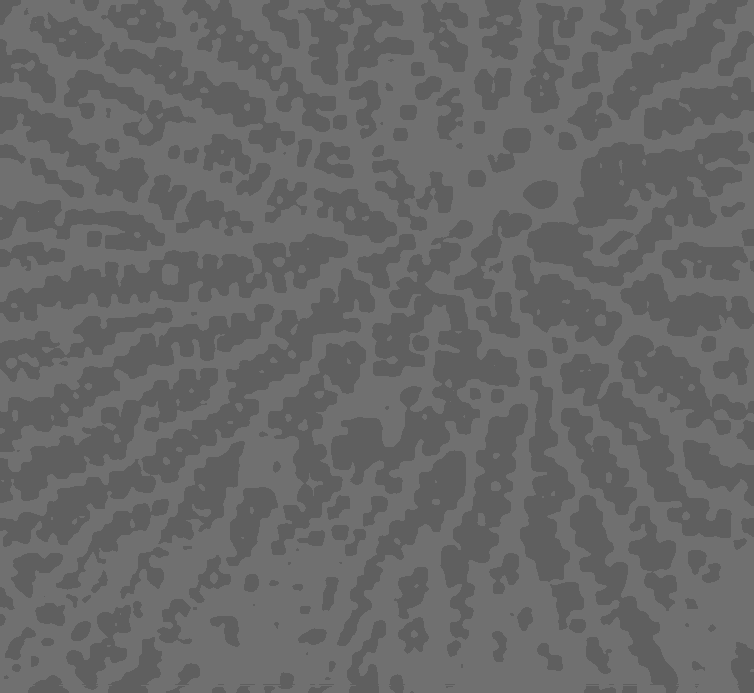

In [279]:
from PIL import Image
im = Image.open("blur_Wild018.tif")
im.quantize(2,0)

<PIL.Image.Image image mode=P size=754x693 at 0x1C2F82B978>


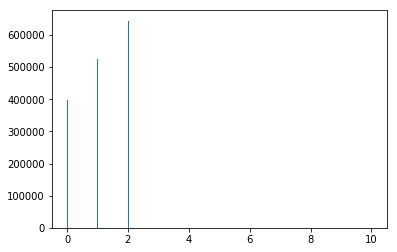

In [274]:
image=im.quantize(3,0)
image.save('simple_Wild018.tif')
print(image)
newimg = cv2.imread('simple_Wild018.tif')
plt.hist(newimg.ravel(),256,[0,10]); plt.show()

/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
/Users/3kh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


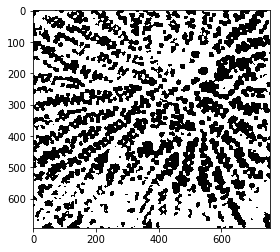

In [275]:
newimg[np.where(newimg == [])] = [255]
newimg[np.where(newimg == [])] = [255]
newimg[np.where(newimg == [0])] = [255]
newimg[np.where(newimg == [1])] = [255]
plt.imshow(newimg)
#print(newimg)

2


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (693, 754, 3) looks like an RGB image
  warn(msg.format(image.shape))


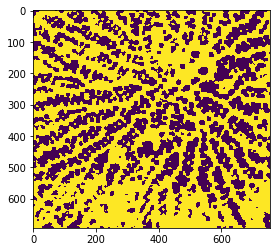

In [276]:
from skimage.filters import threshold_otsu
th=threshold_otsu(newimg)
print(th)
np.shape(newimg)

threshold = newimg[:,:,0] > th
plt.imshow(threshold)

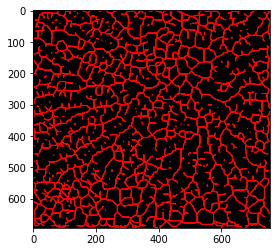

In [277]:
from skimage.morphology import skeletonize
skeleton = skeletonize(threshold)
ax = plt.subplot()
 
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


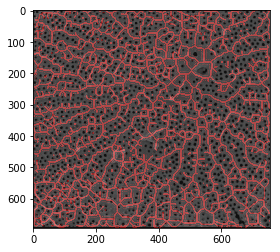

In [278]:
import matplotlib.image as mpimg
img=mpimg.imread('cropped_Wild018.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(skeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()